# Лабораторная работа №4

ФИО:  **Тихонов Данил Владимирович**
Группа: **БИВТ-20-3**

Отправлять можно следующими способами (**обязательно указать свое ФИО и группу в каком-либо виде**):
1. Создать **приватный** репозиторий на github, добавить меня по нику (l3lush) в Collaborators (Settings -> Collaborators -> Add people)
2. Отправить заполненный ноутбук мне на почту avmysh@gmail.com, либо m1603956@edu.misis.ru
3. Отправить заполненный ноутбук мне в тг @l3lush. 

**Deadline**:
- hard -- **04.06.2023 23:59** (дедлайн теперь один)


**Что необходимо сделать** (можете вдохновляться ноутбуками для семинара, они должны помочь):
1. Загрузить датасет (вариант смотреть [здесь](https://docs.google.com/spreadsheets/d/1pFk1qZJtMrV8GWUmdSjV5Kz6JnFdBQDShErFZ337FDc/edit?usp=sharing))
2. Описать кратенько словами датасет, описать поставку задачи, что от чего отличаем, привести примеры картинок (картинки можно визуализировать после шага 3, когда у вас будет красивый датасет).
3. Оформить датасет в виде объекта класса Dataset из PyTorch (обязательно надо сделать препроцессинг данных: нормализовать данные, добавить аугментации к данным и пр.).
4. Оформить датасет из шага 3 в Dataloader.
5. Реализовать архитектуру собственной нейросети и натренировать ее на датасете (можно не обучать 1000 эпох, достаточно 10 эпох, но чтобы метрики начали улучшаться).
6. Обучить нейросеть, используя Transfer Learning. Модель можно выбрать на свой вкус (список всех моделей, доступных в torchvision есть [тут](https://pytorch.org/vision/stable/models.html)).
7. Посчитать метрики качества финальной модели, сделать выводы.

**Замечание**  
Если понимаете, что данные слишком много весят, или с датасетом что-то не так, можете брать любой другой.  

P.S. Чтобы не ждать века, тренируйте модели на Colab с использованием GPU (Runtime -> Change runtime type -> GPU)  
P.S.S. Сохраняйте вывод ячеек и пушьте вместе с ним, в противном случае я не смогу нормально проверить все работы, если буду запускать все ноутбуки и ждать обучение моделей

# 1. Загрузка датасета

In [1]:
!pip install -q datasets

from datasets import load_dataset

dataset = load_dataset('keremberke/pokemon-classification', 'full') 
# !pip install numba

# from numba import cuda 
# device = cuda.get_current_device()

# device.reset()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 18.6 MB/s eta 0:00:00


Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Dataset pokemon-classification downloaded and prepared to /root/.cache/huggingface/datasets/keremberke___pokemon-classification/full/1.0.0/5193d0f863ed08164636296506df483caa6c9965bc05198ec2136417398e4b28. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [2]:
dataset

DatasetDict({
    train: Dataset({
        features: ['image_file_path', 'image', 'labels'],
        num_rows: 4869
    })
    validation: Dataset({
        features: ['image_file_path', 'image', 'labels'],
        num_rows: 1390
    })
    test: Dataset({
        features: ['image_file_path', 'image', 'labels'],
        num_rows: 732
    })
})

# 2. Описание
Датасет keremberke/pokemon-classification имеет 150 классов покемонов. Датасет содержит данные для обучения, тестирования и валидации нейросети.

В данной лабораторной работе я буду пытаться отличать описанные ниже классы классы друг от друга.

In [3]:
labels = dataset["test"].features["labels"].names
label2id, id2label = dict(), dict()
for i, label in enumerate(labels):
    print(i, label)
    label2id[label] = i
    id2label[i] = label

0 Porygon
1 Goldeen
2 Hitmonlee
3 Hitmonchan
4 Gloom
5 Aerodactyl
6 Mankey
7 Seadra
8 Gengar
9 Venonat
10 Articuno
11 Seaking
12 Dugtrio
13 Machop
14 Jynx
15 Oddish
16 Dodrio
17 Dragonair
18 Weedle
19 Golduck
20 Flareon
21 Krabby
22 Parasect
23 Ninetales
24 Nidoqueen
25 Kabutops
26 Drowzee
27 Caterpie
28 Jigglypuff
29 Machamp
30 Clefairy
31 Kangaskhan
32 Dragonite
33 Weepinbell
34 Fearow
35 Bellsprout
36 Grimer
37 Nidorina
38 Staryu
39 Horsea
40 Electabuzz
41 Dratini
42 Machoke
43 Magnemite
44 Squirtle
45 Gyarados
46 Pidgeot
47 Bulbasaur
48 Nidoking
49 Golem
50 Dewgong
51 Moltres
52 Zapdos
53 Poliwrath
54 Vulpix
55 Beedrill
56 Charmander
57 Abra
58 Zubat
59 Golbat
60 Wigglytuff
61 Charizard
62 Slowpoke
63 Poliwag
64 Tentacruel
65 Rhyhorn
66 Onix
67 Butterfree
68 Exeggcute
69 Sandslash
70 Pinsir
71 Rattata
72 Growlithe
73 Haunter
74 Pidgey
75 Ditto
76 Farfetchd
77 Pikachu
78 Raticate
79 Wartortle
80 Vaporeon
81 Cloyster
82 Hypno
83 Arbok
84 Metapod
85 Tangela
86 Kingler
87 Exeggutor
88 

In [4]:
dataset['train'][1]['image'].size

(224, 224)

# 3-4. Оформление датасета

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import Adam
from torch.optim import lr_scheduler
import torchvision
from torchvision import datasets, models, transforms
from torchvision import transforms
from torch.utils.data import DataLoader, ConcatDataset

import matplotlib.pyplot as plt
import numpy as np
import time
import os
import copy

In [6]:
class ImageDataset(torch.utils.data.Dataset):

  def __init__(self, input_data):
        
      self.input_data = input_data
      
      self.transform = transforms.Compose([
        # transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Resize((224, 224), antialias=True),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ])

  def __len__(self):
      return len(self.input_data)
    
  def get_images(self, idx):
      return self.transform(self.input_data[idx]['image'])
  
  def get_labels(self, idx):
      return self.input_data[idx]['labels']
  
  def __getitem__(self, idx):
      # Get input data in a batch
      train_images = self.get_images(idx)
      train_labels = self.get_labels(idx)

      return train_images, train_labels

In [7]:
train_dataset = ImageDataset(dataset["train"])
val_dataset = ImageDataset(dataset["validation"])
test_dataset = ImageDataset(dataset["test"])

# train_dataloader = DataLoader(train_dataset, batch_size=128, shuffle=True)
# val_dataloader = DataLoader(val_dataset, batch_size=128, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=128, shuffle=False)

dsab_cat = ConcatDataset([train_dataset, val_dataset])
train_dataloader = DataLoader(dsab_cat, batch_size=128, shuffle=True)

class_names = dataset["test"].features["labels"].names
dataset_sizes = {
    'train': len(dataset['train']) + len(dataset['validation']),
    'test': len(dataset['test']),
}

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")

In [8]:
train_dataloader

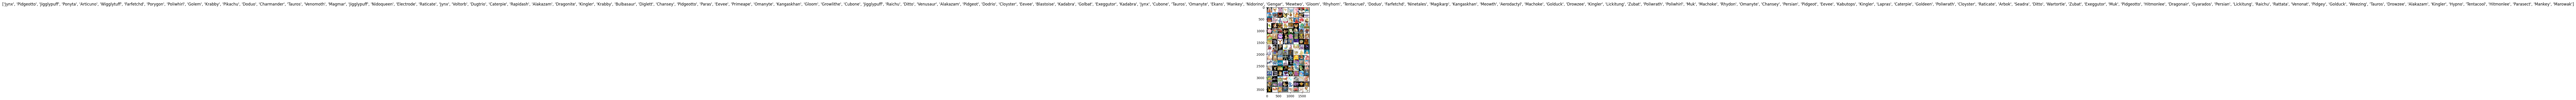

In [9]:
def imshow(inp, title=None):
    inp = inp.numpy().transpose((1, 2, 0)) 
    #mean = np.array([0.5, 0.5, 0.5])
    #std = np.array([0.5, 0.5, 0.5])
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)


inputs, classes = next(iter(train_dataloader))

out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

# 5. Реализация собственной нейросети

In [10]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        for phase in ['train', 'test']:
            if phase == 'train':
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0

            current_dataloader = train_dataloader
            if phase == 'test':
                current_dataloader = test_dataloader


            for inputs, labels in current_dataloader:
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()
                
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)


                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            if (epoch_acc > best_acc):
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    model.load_state_dict(best_model_wts)
    return model


In [13]:
model = nn.Sequential(
            nn.Conv2d(3, 32, 3),
            nn.ELU(),
            nn.Conv2d(32, 32, 3, 3, 3),
            nn.ELU(),
            nn.MaxPool2d(3),

            nn.Conv2d(32, 64, 3),
            nn.ELU(),
            nn.Conv2d(64, 64, 3, 3, 3),
            nn.ELU(),
            nn.MaxPool2d(3),

            nn.BatchNorm2d(64),

            nn.Flatten(),

            nn.Linear(576, 256),
            nn.Linear(256, 150),
        )

# Define the input image dimensions, number of classes, etc.
# import os
# os.environ['CUDA_LAUNCH_BLOCKING'] = '1'
# torch.cuda.memory_summary(device=None, abbreviated=False)

model = model.to(device)

criterion = nn.CrossEntropyLoss().to(device)

optimizer_ft = optim.Adam(model.parameters(), lr=0.01)

exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=4, gamma=0.2)
model_fitted = train_model(model, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=10)

Epoch 0/9
----------
train Loss: 4.5211 Acc: 0.1120
test Loss: 12.1470 Acc: 0.0027

Epoch 1/9
----------
train Loss: 2.6743 Acc: 0.3499
test Loss: 11.4961 Acc: 0.0246

Epoch 2/9
----------
train Loss: 1.8412 Acc: 0.5085
test Loss: 11.3250 Acc: 0.0314

Epoch 3/9
----------
train Loss: 1.4684 Acc: 0.6065
test Loss: 11.7017 Acc: 0.0150

Epoch 4/9
----------
train Loss: 0.8515 Acc: 0.7661
test Loss: 11.8644 Acc: 0.0410

Epoch 5/9
----------
train Loss: 0.6382 Acc: 0.8265
test Loss: 13.0558 Acc: 0.0478

Epoch 6/9
----------
train Loss: 0.5449 Acc: 0.8506
test Loss: 13.7059 Acc: 0.0423

Epoch 7/9
----------
train Loss: 0.4621 Acc: 0.8757
test Loss: 14.1788 Acc: 0.0437

Epoch 8/9
----------
train Loss: 0.3353 Acc: 0.9222
test Loss: 14.5331 Acc: 0.0410

Epoch 9/9
----------
train Loss: 0.3061 Acc: 0.9324
test Loss: 14.7054 Acc: 0.0423

Training complete in 4m 39s
Best val Acc: 0.932417


In [14]:
def predict(img):

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")
    transform = transforms.Compose([
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Resize((224, 224), antialias=True),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ])
    
    img = transform(img)
    output = model_fitted(img.unsqueeze(0).to(device))
    prediction = output.argmax(dim=1).item()

    return id2label[prediction]

In [15]:
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(test_dataloader):
            inputs = inputs.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title('predicted: {}'.format(class_names[preds[j]]))
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

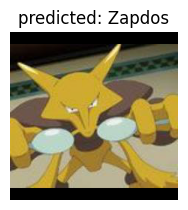

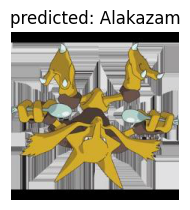

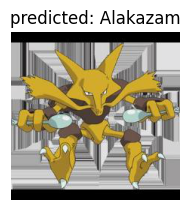

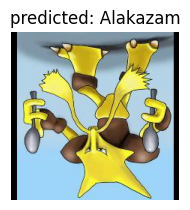

In [16]:
visualize_model(model_fitted, 4)

Growlithe


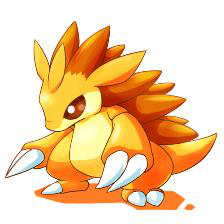

In [17]:
num = 105
print(predict(dataset['test'][num]['image']))
dataset['test'][num]['image']

# 6. Transfer Learning

## ResNet-18

In [11]:
model_ft = models.resnet18(pretrained=True)
num_ftrs = model_ft.fc.in_features

model_ft.fc = nn.Linear(num_ftrs, 150)

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss().to(device)

optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.01, momentum=0.9)

exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=3, gamma=0.1)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 107MB/s]


In [12]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=10)

Epoch 0/9
----------
train Loss: 3.6033 Acc: 0.3496
test Loss: 8.7833 Acc: 0.0109

Epoch 1/9
----------
train Loss: 0.7964 Acc: 0.9053
test Loss: 8.7508 Acc: 0.0355

Epoch 2/9
----------
train Loss: 0.2647 Acc: 0.9704
test Loss: 8.7370 Acc: 0.0478

Epoch 3/9
----------
train Loss: 0.1434 Acc: 0.9915
test Loss: 8.7891 Acc: 0.0464

Epoch 4/9
----------
train Loss: 0.1304 Acc: 0.9934
test Loss: 8.7881 Acc: 0.0464

Epoch 5/9
----------
train Loss: 0.1234 Acc: 0.9938
test Loss: 8.7692 Acc: 0.0478

Epoch 6/9
----------
train Loss: 0.1165 Acc: 0.9946
test Loss: 8.7791 Acc: 0.0464

Epoch 7/9
----------
train Loss: 0.1153 Acc: 0.9947
test Loss: 8.7794 Acc: 0.0464

Epoch 8/9
----------
train Loss: 0.1152 Acc: 0.9954
test Loss: 8.8070 Acc: 0.0464

Epoch 9/9
----------
train Loss: 0.1150 Acc: 0.9952
test Loss: 8.7848 Acc: 0.0478

Training complete in 7m 27s
Best val Acc: 0.995367


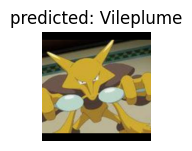

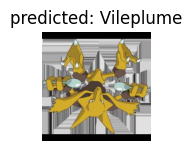

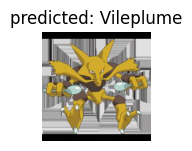

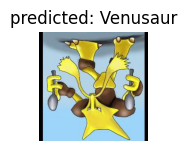

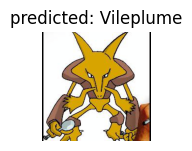

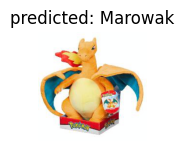

In [20]:
visualize_model(model_ft)

#7. Выводы

## Собственная модель

###Train 
Loss: 0.3061 Acc: 0.9324
###Test 
Loss: 14.7054 Acc: 0.0423

Собственная модель показала очень плохие результаты. Возможно стоит изменить препроцессинг данных и настроить слои.

## ResNet-18

###Train 
Loss: 0.1150 Acc: 0.9952
###Test 
Loss: 8.7848 Acc: 0.0478

Модель ResNet-18 показала результаты чуть лучше, чем собственная модель.